In [1]:
# xarray test 2
# conda: xesmfTools

import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset('http://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr/gfs20210328/gfs_0p25_1hr_12z', chunks={'time': 1})

/home/cermak/miniconda3/envs/xesmfTools/lib/python3.7/site-packages/xarray/coding/times.py:113: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [3]:
#ds

In [4]:
# snodsfc
snodsfc     = ds.snodsfc.isel(time=0)
snodsfcFcst = ds.snodsfc.isel(time=120)

In [5]:
snodsfc     = snodsfc.where(snodsfc.lat >= 50.0)
snodsfcFcst = snodsfcFcst.where(snodsfcFcst.lat >= 50.0)
snoDiff     = (snodsfcFcst - snodsfc) * 39.3701

(170.0, 250.0)

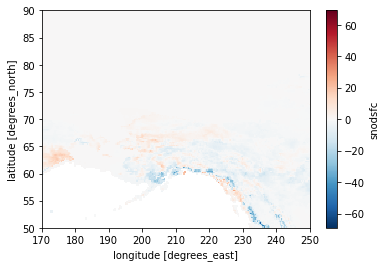

In [6]:
snoDiff.plot()
plt.ylim([50.0, 90.0])
plt.xlim([170.0, 250.0])

In [7]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

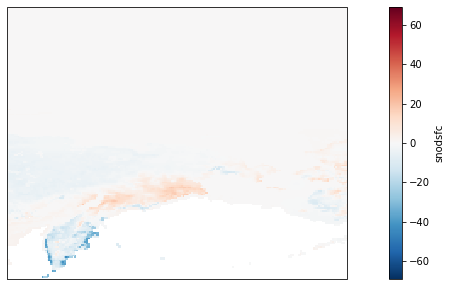

In [20]:
proj = ccrs.LambertConformal(central_longitude=-150, central_latitude=50)
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)

snoDiff.plot()
plt.ylim([50.0, 90.0])
plt.xlim([150.0, 200.0])

coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m)

In [16]:
#snoDiff

<xarray.DataArray 'snodsfc' (lat: 721, lon: 1440)>
dask.array<mul, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8